In [1]:
#Import the pandas library for data manipulation and analysis
import pandas as pd
#import the numpy library for numerical computations
import numpy as np
#import the train_test_split function from sklearn.model_selection module sed to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
#import the RandomForestClassifier class from sklearn.ensemble module used for building a random forest classifier model
from sklearn.ensemble import RandomForestClassifier
#import the xgboost library for gradient boosting
import xgboost as xgb
#import the Sequential class from tensorflow.keras.models moduleUsed to create a sequential neural network model
from tensorflow.keras.models import Sequential
#import the Dense, Conv1D, MaxPooling1D, and Flatten layers from tensorflow.keras.layers moduleUsed to add different layers to the neural network model
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

2023-06-05 20:32:07.206931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Read a CSV file 'heart_failure_clinical_records_dataset.csv' and store it in a pandas DataFrame named 'df'
df = pd.read_csv('heart_failure_clinical_records_dataset.csv') 

In [7]:
# Display the first few rows of the dataset
df.head()



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
# Get an overview of the dataset including data types and non-null values
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
# Compute statistical summary of the dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('DEATH_EVENT', axis=1), df['DEATH_EVENT'], test_size=0.2, random_state=42)



In [4]:
# Define CNN model architecture
model = Sequential()#Create a sequential model
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))#Add a convolutional layer with 64 filters, kernel size of 3 and ReLU activation function
model.add(MaxPooling1D(pool_size=2))#Input shape is based on the number of columns in X_train and 1 channel
model.add(Flatten())#Flatten the output of the convolutional layer
model.add(Dense(1, activation='sigmoid'))#Add a dense layer with a single neuron and sigmoid activation function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])#Compile the model with Adam optimizer and binary crossentropy loss function



2023-04-13 21:27:48.686366: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 21:27:48.777127: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


In [5]:
# Train the model using training data
model.fit(X_train.values.reshape((-1, X_train.shape[1], 1)), y_train, epochs=10, batch_size=32, verbose=0)



In [6]:

# Random Forest Classifier
from sklearnex import patch_sklearn
patch_sklearn()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


RandomForestClassifier(random_state=42)

In [7]:
# XGBoost Classifier
from sklearnex import patch_sklearn
patch_sklearn()
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_clf.fit(X_train, y_train)



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
/glob/development-tools/versions/oneapi/2022.3.1/oneapi/intelpython/latest/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:27:53] WARNING: /home/sat_bot/base/conda-bld/xgboost_1659485138838/work/src/learner.cc:1096: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
# Evaluate the models on the test set
cnn_score = model.evaluate(X_test.values.reshape((-1, X_test.shape[1], 1)), y_test, verbose=0)[1]
rf_score = rf.score(X_test, y_test)
xgb_score = xgb_clf.score(X_test, y_test)



In [9]:
# Print the test accuracy of each model
print('CNN Test Accuracy:', cnn_score)
print('Random Forest Test Accuracy:', rf_score)
print('XGBoost Test Accuracy:', xgb_score)



CNN Test Accuracy: 0.5833333134651184
Random Forest Test Accuracy: 0.75
XGBoost Test Accuracy: 0.7166666666666667


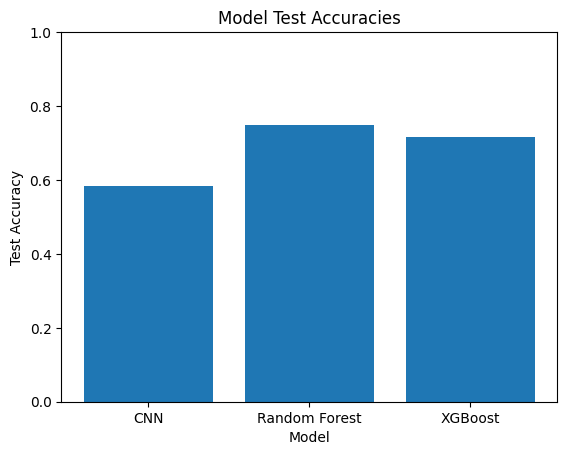

In [10]:
# Plot the accuracy of each model
import matplotlib.pyplot as plt
models = ['CNN', 'Random Forest', 'XGBoost']
accuracy = [cnn_score, rf_score, xgb_score]
plt.bar(models, accuracy)
plt.title('Model Test Accuracies')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim([0, 1])
plt.show()